In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

import warnings 
warnings.filterwarnings('ignore')

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.15,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,NaN,38,30대,81.87,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.84,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.87,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,NaN,49.156,8.95 SEC,180,44,185,1977-02-09


,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180,1988-12-10,SEC
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188,1977-06-11,SEC
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166,1969-05-12,SEC
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155,1964-11-13,SEC
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168,1966-04-14,SEC


,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY
0,여성,42,40대,68.150,59.571,8.17,166,40,172,1976,4,5,0
1,여성,38,30대,81.870,60.055,8.63,170,48,186,1986,9,6,5
2,여성,43,40대,85.840,54.297,8.65,156,45,168,1978,4,7,4
3,여성,50,50대,70.870,54.625,8.92,146,48,155,1966,8,8,0
4,남성,49,40대,82.427,49.156,8.95,180,44,185,1977,2,9,2


,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,42,68.150,59.571,8.17,166,40,172,1976,4,5,0,1,1,0
1,38,81.870,60.055,8.63,170,48,186,1986,9,6,5,1,0,0
2,43,85.840,54.297,8.65,156,45,168,1978,4,7,4,1,1,0
3,50,70.870,54.625,8.92,146,48,155,1966,8,8,0,1,0,1
4,49,82.427,49.156,8.95,180,44,185,1977,2,9,2,0,1,0


,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,-0.805985,-1.119366,2.334717,-1.771826,-0.361066,-1.856653,-0.200185,-0.008206,-0.814663,-1.233538,-1.415684,0.935414,1.069045,-0.707107
1,-1.506841,0.607422,2.429494,-1.423469,0.029276,-0.777726,1.328503,1.222750,0.606261,-1.116799,1.082582,0.935414,-0.935414,-0.707107
2,-0.630771,1.107082,1.301962,-1.408323,-1.336919,-1.182324,-0.636953,0.237985,-0.814663,-1.000061,0.582929,0.935414,1.069045,-0.707107
3,0.595728,-0.777029,1.366191,-1.203852,-2.312773,-0.777726,-2.056450,-1.239163,0.322076,-0.883322,-1.415684,0.935414,-0.935414,1.414214
4,0.420514,0.677525,0.295251,-1.181133,1.005129,-1.317190,1.219311,0.114889,-1.383032,-0.766583,-0.416378,-1.069045,1.069045,-0.707107


,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,-2.886580e-16,1.265654e-15,1.924387e-15,1.879978e-15,1.154632e-15,1.147230e-16,-1.036208e-15,7.471801e-15,1.147230e-16,2.220446e-17,-1.110223e-16,-4.440892e-17,4.440892e-17,7.401487e-17
std,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00
min,-1.682055e+00,-2.260909e+00,-2.009160e+00,-1.771826e+00,-2.312773e+00,-1.856653e+00,-2.056450e+00,-1.608450e+00,-1.667217e+00,-1.700492e+00,-1.415684e+00,-1.069045e+00,-9.354143e-01,-7.071068e-01
25%,-6.307705e-01,-4.944755e-01,-4.859243e-01,-6.093728e-01,-7.026146e-01,-7.777264e-01,-6.369535e-01,-8.083280e-01,-8.146628e-01,-8.541373e-01,-9.160308e-01,-1.069045e+00,-9.354143e-01,-7.071068e-01


,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459,0.464286,0.272727,0.137931,0.000000,1.0,1.0,0.0
1,0.05,0.700154,1.000000,0.078498,0.60,0.266667,0.837838,0.821429,0.727273,0.172414,0.833333,1.0,0.0,0.0
2,0.30,0.822120,0.745974,0.081911,0.25,0.166667,0.351351,0.535714,0.272727,0.206897,0.666667,1.0,1.0,0.0
3,0.65,0.362212,0.760445,0.127986,0.00,0.266667,0.000000,0.107143,0.636364,0.241379,0.000000,1.0,0.0,1.0
4,0.60,0.717266,0.519169,0.133106,0.85,0.133333,0.810811,0.500000,0.090909,0.275862,0.333333,0.0,1.0,0.0


,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509,0.467,0.533,0.502,0.472,0.533,0.467,0.333
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252,0.295,0.325,0.300,0.339,0.507,0.507,0.479
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351,0.232,0.273,0.250,0.167,0.000,0.000,0.000
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459,0.464,0.409,0.500,0.333,1.000,0.000,0.000
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676,0.571,0.864,0.750,0.833,1.000,1.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,-0.6875,-0.938037,2.463797,-1.535284,-0.296296,-1.162791,0.000000,0.000000,-0.230769,-0.724138,-0.50,0.0,1.0,0.0
1,-1.1875,0.535331,2.558834,-1.218589,0.000000,-0.418605,1.166667,1.052632,0.538462,-0.655172,0.75,0.0,0.0,0.0
2,-0.5625,0.961662,1.428207,-1.204819,-1.037037,-0.697674,-0.333333,0.210526,-0.230769,-0.586207,0.50,0.0,1.0,0.0
3,0.3125,-0.645941,1.492612,-1.018933,-1.777778,-0.418605,-1.416667,-1.052632,0.384615,-0.517241,-0.50,0.0,0.0,1.0
4,0.1875,0.595146,0.418733,-0.998279,0.740741,-0.790698,1.083333,0.105263,-0.538462,-0.448276,0.00,-1.0,1.0,0.0


,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,YEAR,MONTH,DAY,WEEKDAY,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153,0.007,0.210,0.005,0.208,-0.467,0.467,0.333
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776,0.870,0.551,0.601,0.509,0.507,0.507,0.479
min,-1.312,-1.912,-1.892,-1.535,-1.778,-1.163,-1.417,-1.368,-0.692,-1.000,-0.500,-1.000,0.000,0.000
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333,-0.684,-0.231,-0.500,-0.250,-1.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667,0.316,0.769,0.500,0.750,0.000,1.000,1.000
max,1.188,1.583,2.559,2.499,1.185,1.628,1.667,1.579,1.000,1.000,1.000,0.000,1.000,1.000


,Raw,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


,Raw,Standard,MinMax,Robust
count,30.000,30.000,30.000,30.000
mean,53.767,0.000,0.459,0.118
std,7.542,1.017,0.251,0.702
min,40.000,-1.857,0.000,-1.163
25%,48.000,-0.778,0.267,-0.419
50%,52.500,-0.171,0.417,0.000
75%,58.750,0.672,0.625,0.581
max,70.000,2.189,1.000,1.628


array([[<Axes: title={'center': 'Raw'}>,
        <Axes: title={'center': 'Standard'}>],
       [<Axes: title={'center': 'MinMax'}>,
        <Axes: title={'center': 'Robust'}>]], dtype=object)

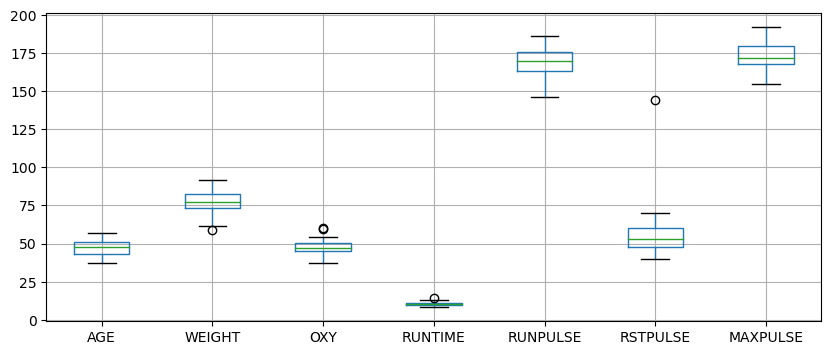

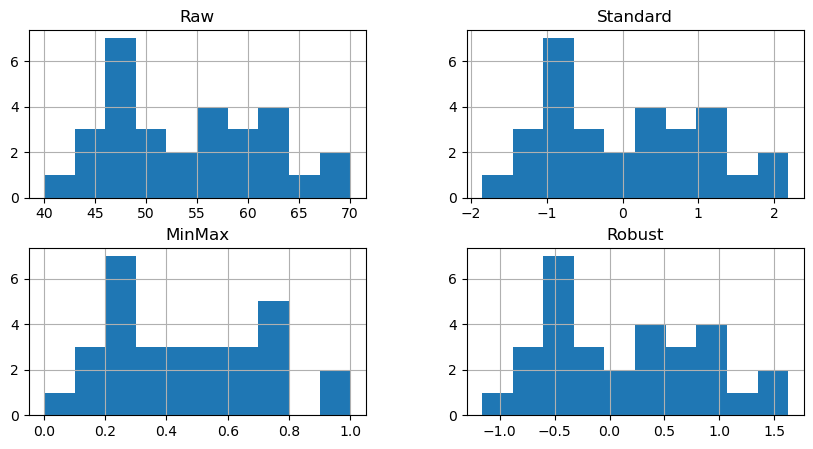

In [4]:
df_raw = pd.read_csv("./실습화일/1 Big Data 분석 기초/FITNESS_정제.csv", encoding = 'euc-kr')
display(df_raw.head())

#결측치 확인
df_raw.isnull().head() #== isna()
#결측치 현황 요약
df_raw.isnull().sum()

#문자형 결측치 처리
df_raw["GENDER"].fillna("여성",inplace=True)
#숫자형 결측치 처리                        
df_raw.groupby("GENDER")["WEIGHT"].agg(["mean"])
#결측치를 남성의 평균으로 대체
df_raw["WEIGHT"] = df_raw["WEIGHT"].fillna(df_raw.groupby("GENDER")["WEIGHT"].transform("mean")).round(3) #agg('mean') 평균값으로 대체
df_raw.head()

#단위와 같이 표현되어 있는 수치형 변수 처리
df_raw[['RUNTIME','RUNTIME_UNIT']] = df_raw['RUNTIME'].str.split(expand=True)  # 변수 2열로 분리
df_raw['RUNTIME'] = df_raw['RUNTIME'].astype('float64') #변수 속성 변경

#상자수염그림
df_raw.boxplot(figsize = (10,4))
               
#이상치 확인(반환값 t/f)
df_raw["RSTPULSE"] >= 100
df_raw.loc[27:29]

#조건 해당 자료 직접 확인
df_raw[(df_raw["RSTPULSE"])>=100]

#이상치 제외
df_fitness = df_raw[df_raw["RSTPULSE"]<100]
df_fitness

df_fitness.reset_index(drop=True, inplace = True)
display(df_fitness)

#일자 속성 변환 및 파생 변수 생성
df_fitness['BIRTH'] = pd.to_datetime(df_fitness['BIRTH'], format='%Y-%m-%d')
df_fitness['YEAR'] = df_fitness['BIRTH'].dt.year
df_fitness['MONTH'] = df_fitness['BIRTH'].dt.month
df_fitness['DAY'] = df_fitness['BIRTH'].dt.day
df_fitness['WEEKDAY'] = df_fitness['BIRTH'].dt.weekday

#분석에 필요하지 않은 변수 제외
df_fitness = df_fitness.drop(['NAME','BIRTH','RUNTIME_UNIT'],axis=1)
display(df_fitness.head())

#범주형 변수 Dummy의 변수화
df_fitness_dummy = pd.get_dummies(df_fitness, drop_first = True)
display(df_fitness_dummy.head())

#scale 변환
scaler = StandardScaler()
df_scale_std = scaler.fit_transform(df_fitness_dummy)

#scale 적용시 ndarray로 저장 -> dataframe으로 변환!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!                                           
df_scale_std = pd.DataFrame(df_scale_std,columns=df_fitness_dummy.columns)
display(df_scale_std.head())

#요약통계량 확인 
df_scale_desc = df_scale_std.describe()
display(df_scale_desc.head())

#최대 최소값 기준 
scaler = MinMaxScaler()
df_scale_minmax = scaler.fit_transform(df_fitness_dummy)

df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_fitness_dummy.columns)
display(df_scale_minmax.head())

#scale 변환 결과 확인 
df_scale_desc = df_scale_minmax.describe()
display(df_scale_desc.round(3))

#로버스트 기준 
df_scale_robust = RobustScaler().fit_transform(df_fitness_dummy)
df_scale_robust = pd.DataFrame(df_scale_robust, columns = df_fitness_dummy.columns)
display(df_scale_robust.head())

df_scale_desc = df_scale_robust.describe()
display(df_scale_desc.round(3))

#표준화 결과 비교 
df_rstpulse = pd.DataFrame()
df_rstpulse["Raw"] = df_fitness_dummy["RSTPULSE"]
df_rstpulse["Standard"] = df_scale_std["RSTPULSE"]
df_rstpulse["MinMax"] = df_scale_minmax["RSTPULSE"]
df_rstpulse["Robust"] = df_scale_robust["RSTPULSE"]
display(df_rstpulse.head().round(3))
display(df_rstpulse.describe().round(3))

df_rstpulse[["Raw","Standard","MinMax","Robust"]].hist(figsize=(10,5))



In [3]:
#탐색적 분석 - 시각화

In [4]:
matplotlib.rc('font',family='Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

df_fitness = pd.read_csv("/home/piai/python/2주차/실습화일/1 Big Data 분석 기초/FITNESS.csv", encoding = 'euc-kr')
display(df_fitness.head())

df_currency = pd.read_csv("/home/piai/python/2주차/실습화일/1 Big Data 분석 기초/환율.csv", parse_dates = ["APPL_DATE"])
display(df_currency.head())



,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


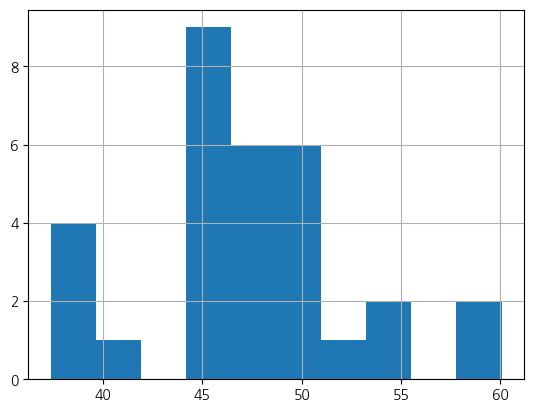

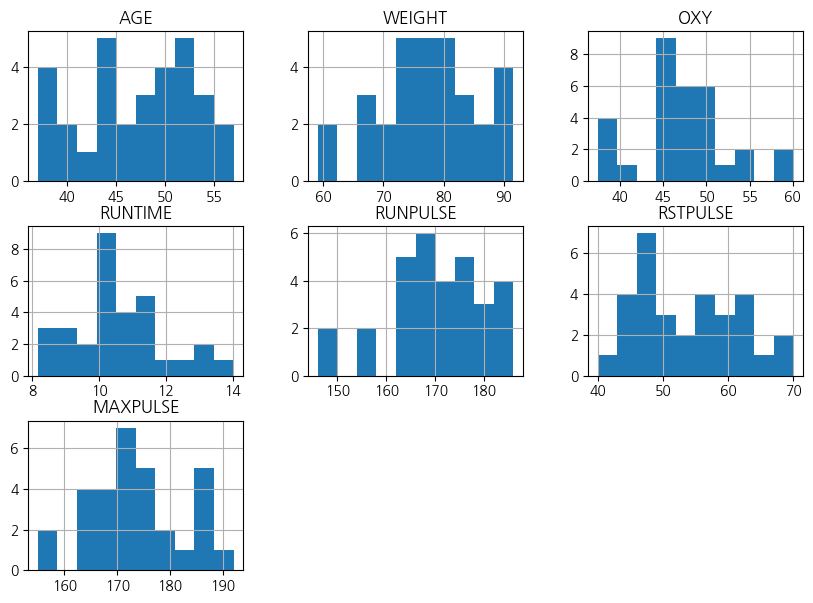

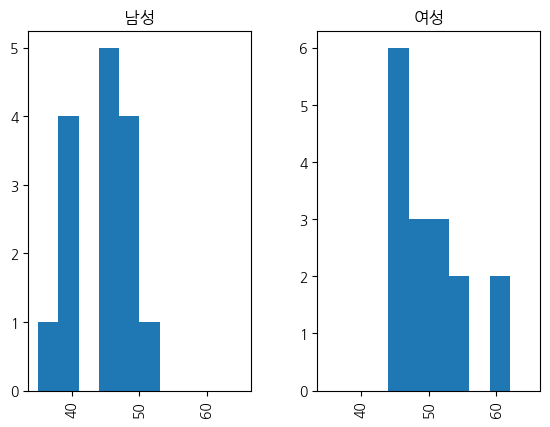

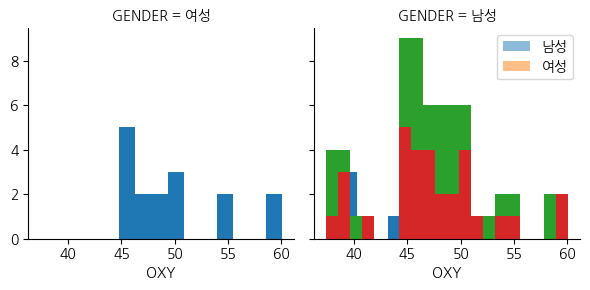

In [20]:
df_fitness["OXY"].hist()
df_fitness.hist(figsize=(10,7))
df_fitness.hist(column="OXY", by="GENDER", range=(35,65))

grid = sns.FacetGrid(df_fitness, col = "GENDER")
grid.map(plt.hist, "OXY")

plt.hist(df_fitness[df_fitness["GENDER"]=="남성"]["OXY"], label="남성", alpha = 0.5)
plt.hist(df_fitness[df_fitness["GENDER"]=="여성"]["OXY"], label="여성", alpha = 0.5)
plt.legend(); #뒤에 ;을 붙히면 어레이 값이 안나옴

plt.hist(x="OXY", data = df_fitness);
plt.hist(x="OXY", data = df_fitness, bins = 20);

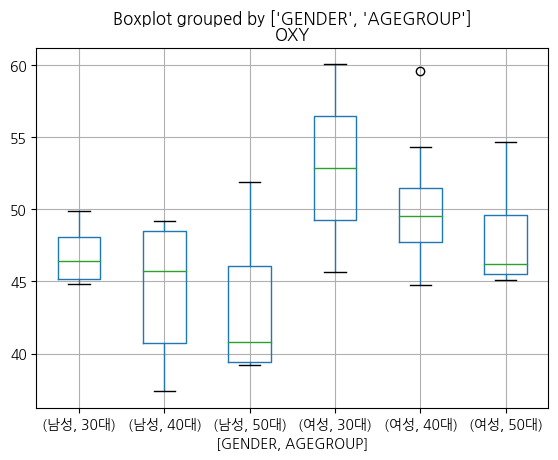

In [24]:
df_fitness.boxplot(column="OXY", by = ["GENDER","AGEGROUP"]);
#여성이 남성보다 수준이 높고, 또한 연령대가 증가할수록 수준이 낮아지는 경향이 있음

<AxesSubplot:ylabel='None'>

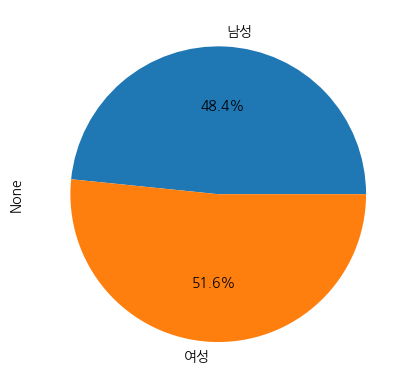

In [29]:
#pie 
df_count = df_fitness.groupby(["GENDER"]).size()
df_count.plot.pie(y="OXY", autopct ="%.1f%%")

<AxesSubplot:ylabel='None'>

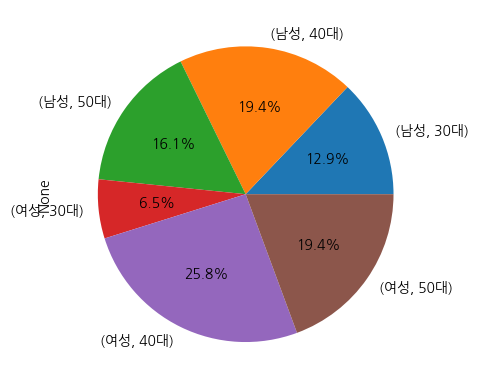

In [30]:
df_count = df_fitness.groupby(["GENDER", "AGEGROUP"]).size()
df_count.plot.pie(y="OXY", autopct = "%.1f%%")

<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

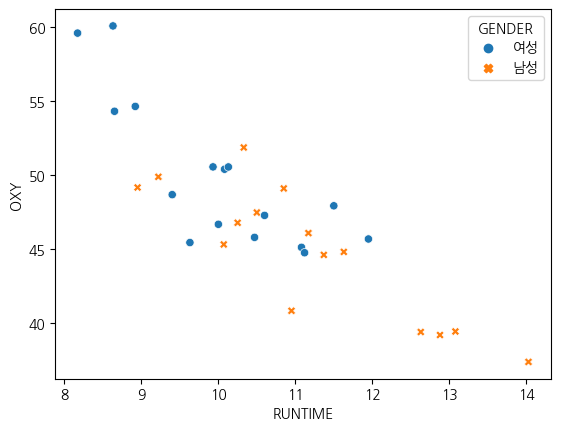

In [31]:
#scatter plot
sns.scatterplot(x="RUNTIME", y="OXY", hue = "GENDER", style = "GENDER", data = df_fitness)

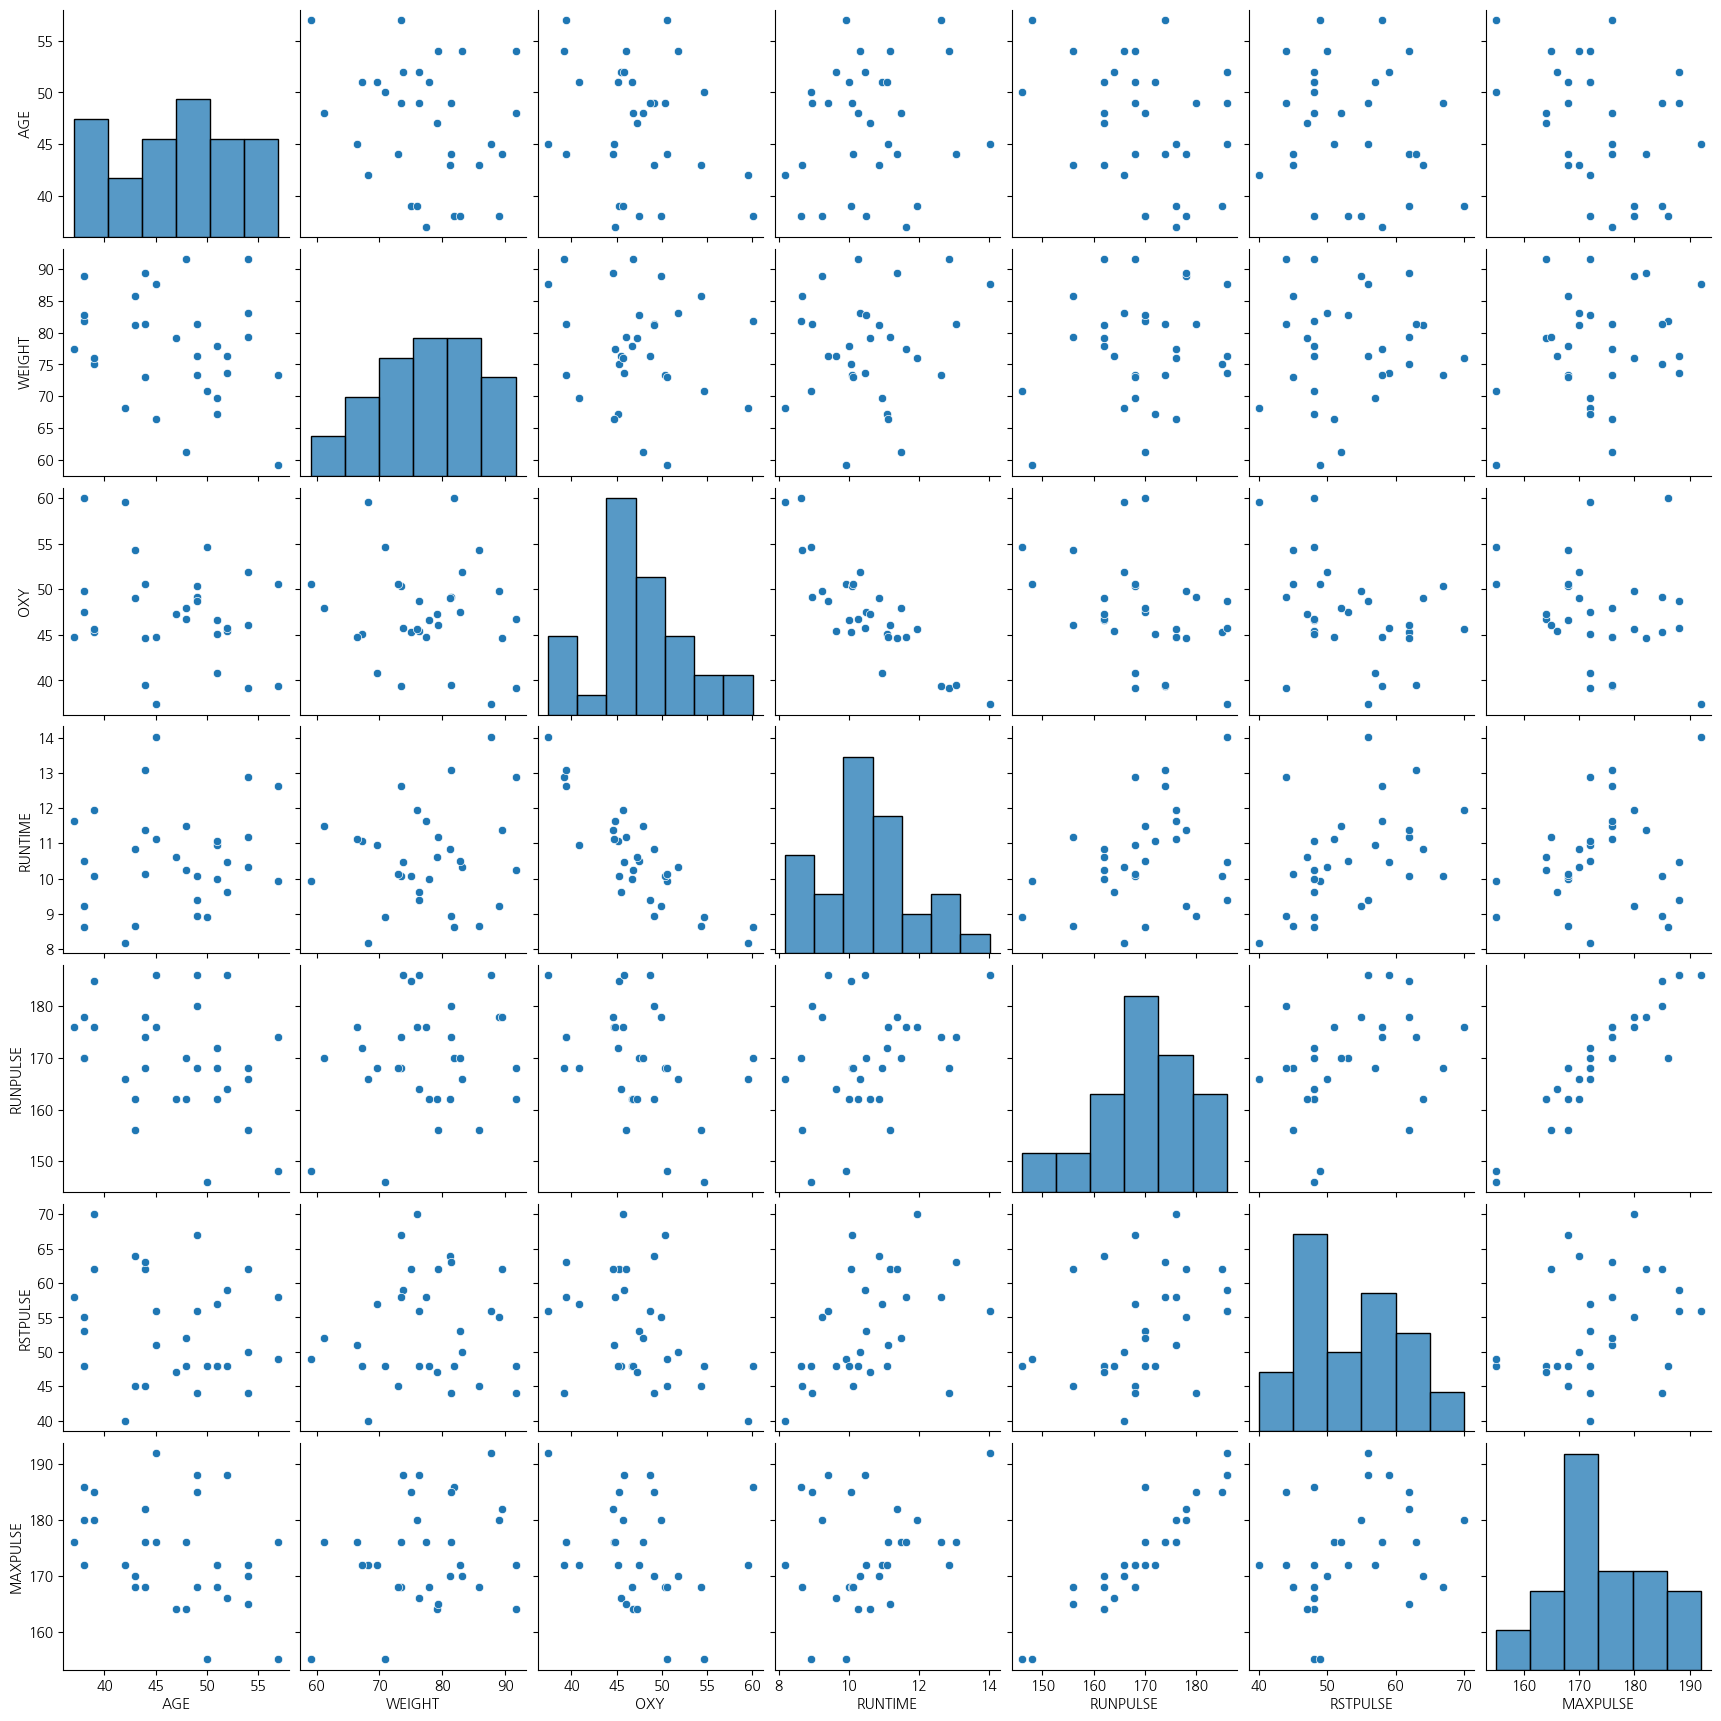

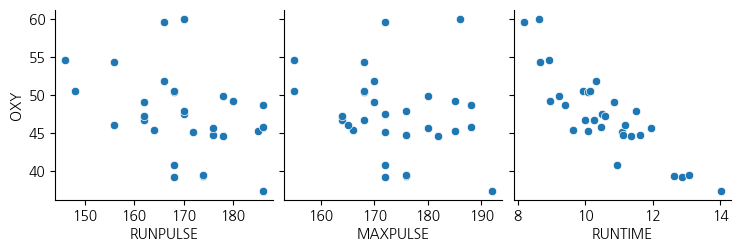

In [32]:
#scatter matrix
sns.pairplot(df_fitness)
sns.pairplot(df_fitness, y_vars=["OXY"], x_vars=["RUNPULSE","MAXPULSE","RUNTIME"])

#운동맥박과 최대맥박 등 변수 간의 선형 관계를 확인할 수 있고, 혈당 산소 요구량은 운동시간과 반비례

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


<AxesSubplot:xlabel='APPL_DATE'>

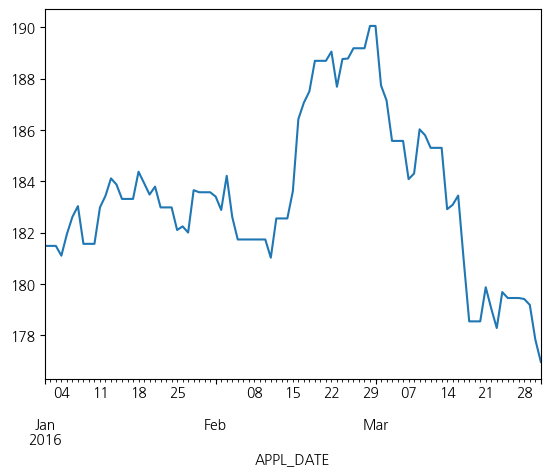

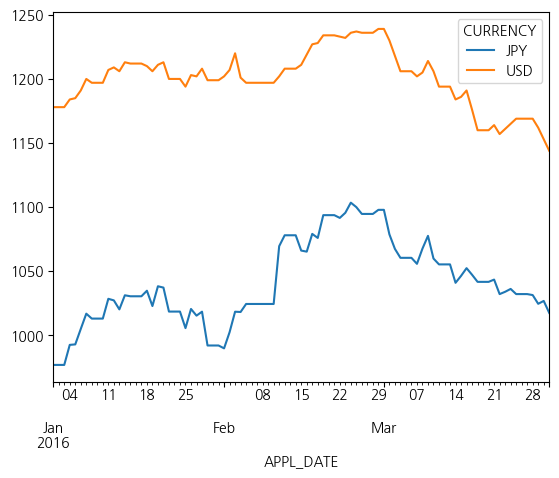

In [36]:
#trend chart
df_currency_pivot = df_currency.pivot(index = "APPL_DATE", columns = "CURRENCY", values = "STD_RATE")
display(df_currency_pivot.head())

df_currency_pivot["CNY"].plot()
df_currency_pivot[["JPY","USD"]].plot()

<AxesSubplot:xlabel='AGEGROUP', ylabel='GENDER'>

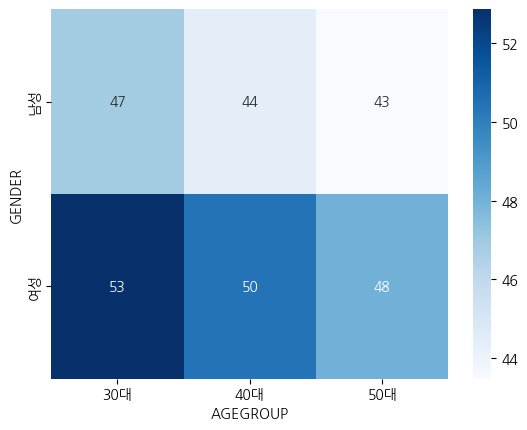

In [38]:
#heatmap
df_agg = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index=False).agg("mean")
df_pivot = df_agg.pivot("GENDER", "AGEGROUP","OXY")
sns.heatmap(df_pivot, cmap="Blues", annot = True)
#annot = True시 값이 입력됨 

<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

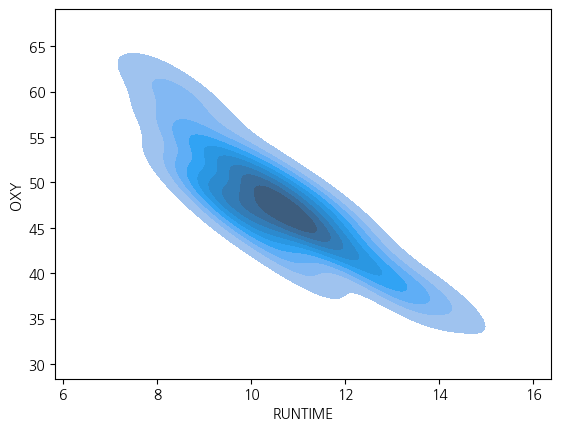

In [41]:
#contour plot
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"],shade = True)
#shade: 음영여부 

<AxesSubplot:>

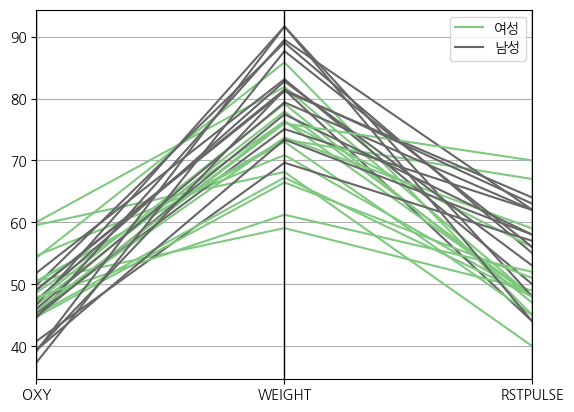

In [42]:
#parallel plot

pd.plotting.parallel_coordinates(df_fitness, "GENDER", cols=["OXY","WEIGHT","RSTPULSE"], colormap = "Accent")


Text(0.5, 81.7222222222222, '혈당 산소 요구량')

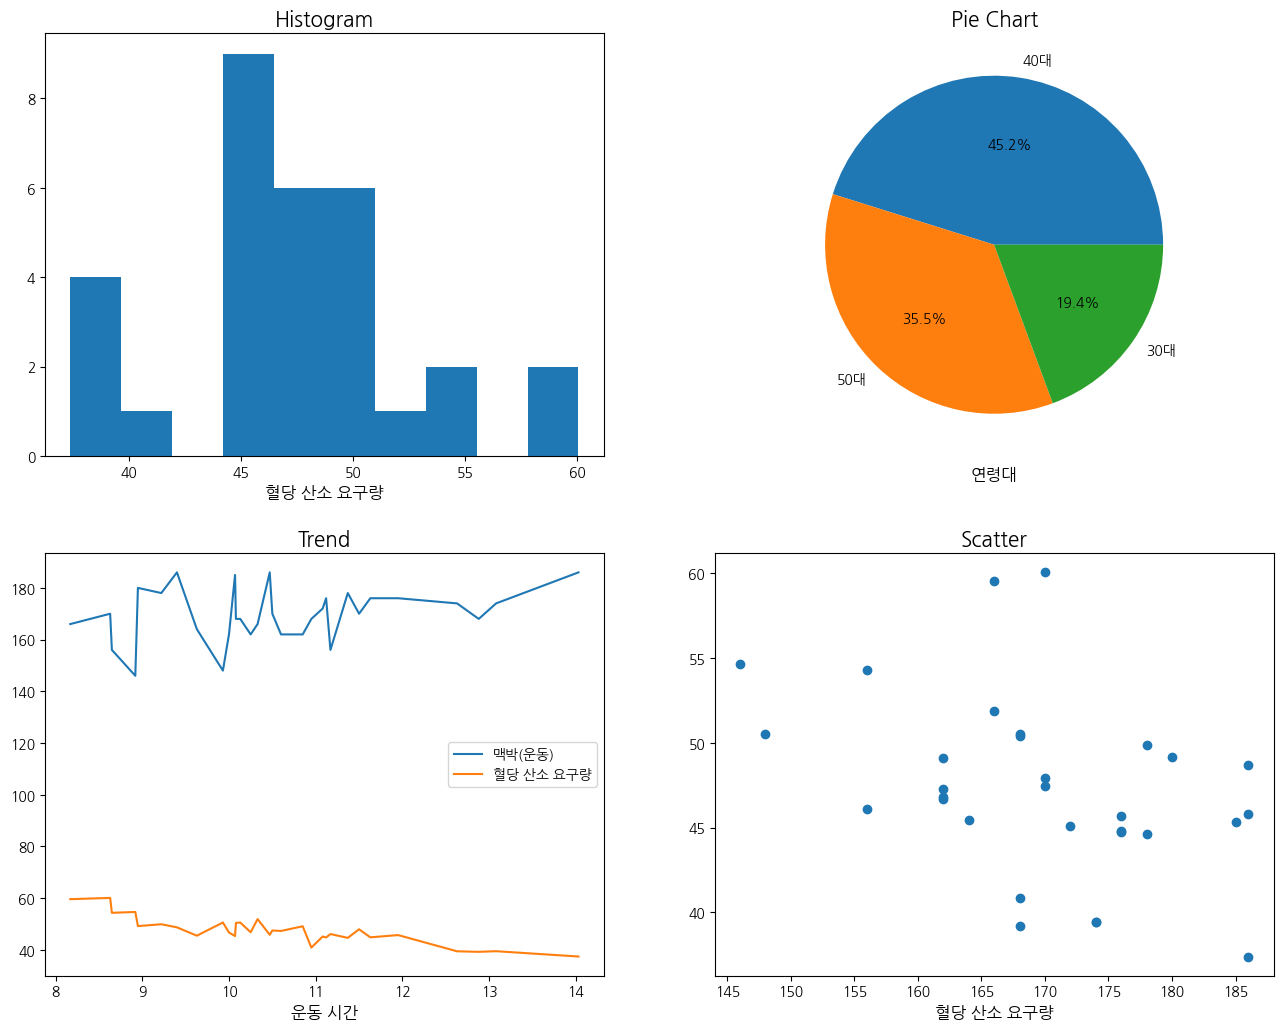

In [47]:
#customizing

df_count = df_fitness["AGEGROUP"].value_counts()
fig, axes = plt.subplots(nrows=2, ncols =2, figsize=(13,10))
plt.tight_layout(w_pad=5,h_pad=5)

#histogram
axes[0,0].hist(df_fitness["OXY"])
axes[0,0].set_title("Histogram", fontsize=15)
axes[0,0].set_xlabel("혈당 산소 요구량", fontsize=12)

#Pie chart
axes[0,1].pie(df_count, labels=df_count.index.tolist(), autopct = "%.1f%%")
axes[0,1].set_title("Pie Chart", fontsize=15)
axes[0,1].set_xlabel("연령대", fontsize=12)

#Trend
axes[1,0].plot("RUNTIME","RUNPULSE", data = df_fitness, label = "맥박(운동)")
axes[1,0].plot("RUNTIME","OXY", data = df_fitness, label = "혈당 산소 요구량")
axes[1,0].set_title("Trend", fontsize=15)
axes[1,0].set_xlabel("운동 시간", fontsize=12)
axes[1,0].legend()

#Scatter
axes[1,1].scatter("RUNPULSE","OXY",data=df_fitness)
axes[1,1].set_title("Scatter", fontsize=15)
axes[1,1].set_xlabel("맥박(운동)", fontsize=12)
axes[1,1].set_xlabel("혈당 산소 요구량", fontsize=12)

In [54]:
ds_mycars = pd.read_csv("/home/piai/python/2주차/실습화일/1 Big Data 분석 기초/mycars.csv")
display(ds_mycars.head())

display(ds_mycars.describe().round(3))

df = ds_mycars[['model','mpg']]
display(df.groupby('model').describe())

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


,displacement,year,cylinder,mpg,highway_mileage
count,234.000,234.00,234.000,234.000,234.000
mean,3.472,2003.50,5.889,16.859,23.440
std,1.292,4.51,1.612,4.256,5.955
min,1.600,1999.00,4.000,9.000,12.000
25%,2.400,1999.00,4.000,14.000,18.000
50%,3.300,2003.50,6.000,17.000,24.000
75%,4.600,2008.00,8.000,19.000,27.000
max,7.000,2008.00,8.000,35.000,44.000


mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

In [56]:
ds_Exh_QC1 = pd.read_csv("/home/piai/python/2주차/실습화일/1 Big Data 분석 기초/EXH_QC1.csv")
df = ds_Exh_QC1[['Flaws','Period']]

count = df['Flaws'].value_counts().sort_index()
cumcnt = np.cumsum(count)

percent = count/sum(count) * 100
cumpct = np.cumsum(percent)

count_data=pd.DataFrame({'Count':count, 'CumCnt':cumcnt, 'Percent':percent, 'CumPct':cumpct})
count_data.columns.name='Flaws'
count_data

Flaws,Count,CumCnt,Percent,CumPct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


In [58]:
mu = 115
sigma = 20
x = 135
prob = stats.norm.cdf(x,mu,sigma)

print(format((1-prob)*100))

15.865525393145708


In [63]:
t = 1.53
df = 5

prob = stats.t.cdf(t, df)
print(prob)

0.9067148091500739


In [69]:
chisq = 10
df = 30

prob = stats.chi2.cdf(chisq, df)
print(prob)

0.00022625367617675488
